In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'non_neuro', 'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


CNS1 Working Definition: Neuro vs Non-Neuro -- Fulldata analysis
best accuracy:  0.6275626423690205  best params:  {'k': 5, 'lambda': 0, 'random_state': 2}


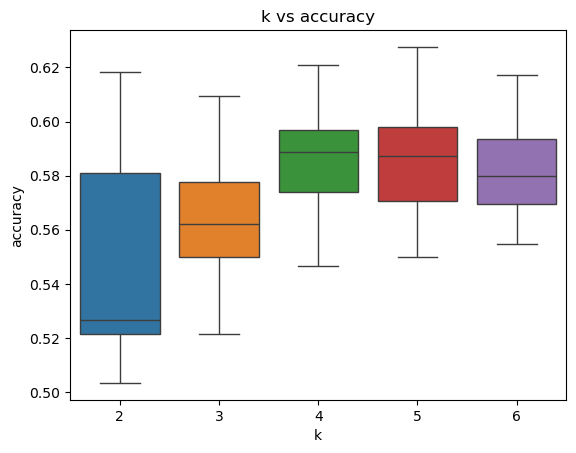

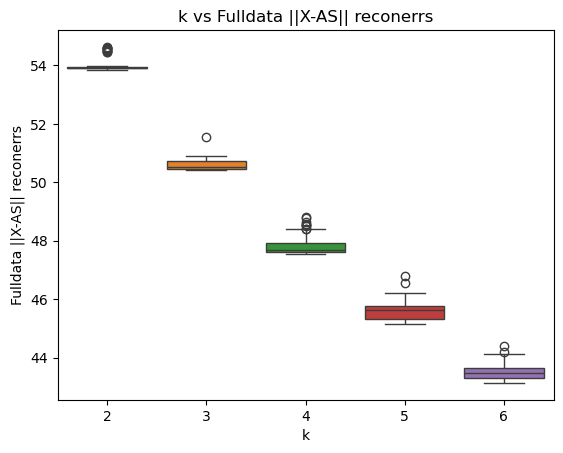

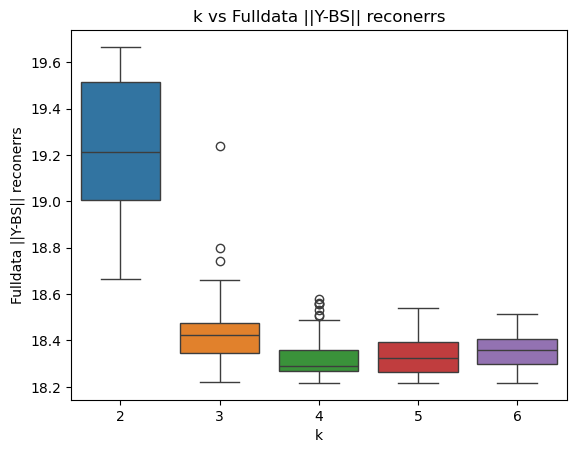

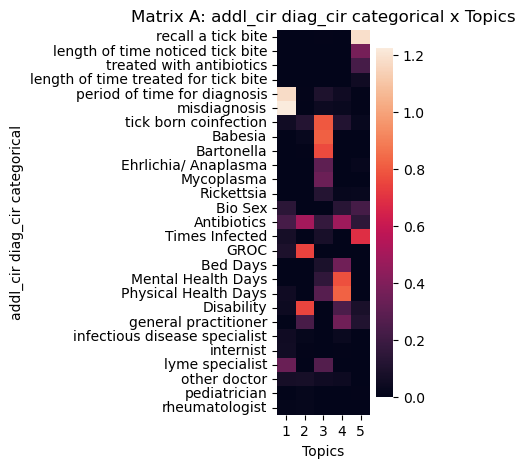

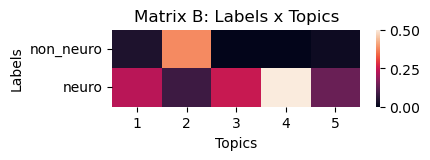

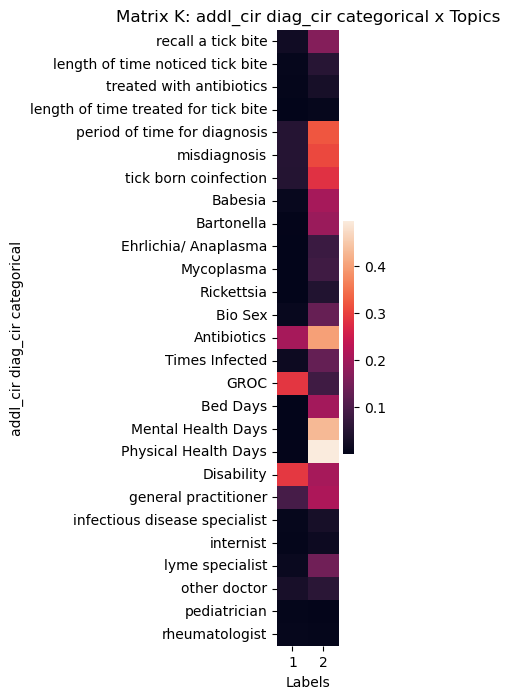

In [2]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO, NON_NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy_fd, best_params_fd, accu_distr_fd, Xreconerr_distr_fd, Yreconerr_distr_fd = ssnmf.fulldatasearch(param_range={'k': range(2,7),'lambda': [0], 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)

print('CNS1 Working Definition: Neuro vs Non-Neuro -- Fulldata analysis')
print('best accuracy: ', best_accuracy_fd, ' best params: ', best_params_fd)

display_distr(accu_distr_fd)
display_distr(Xreconerr_distr_fd, ylabel='Fulldata ||X-AS|| reconerrs')
display_distr(Yreconerr_distr_fd, ylabel='Fulldata ||Y-BS|| reconerrs')

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.fulldata_best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394